In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import MinMaxScaler



In [ ]:
election_data = pd.read_csv('countypres_2000-2020.csv')

In [ ]:
election_data.head()

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,AL GORE,DEMOCRAT,4942,17208,20220315,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993,17208,20220315,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,RALPH NADER,GREEN,160,17208,20220315,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,OTHER,OTHER,113,17208,20220315,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,AL GORE,DEMOCRAT,13997,56480,20220315,TOTAL


In [ ]:
# Data Cleaning
# Check for any missing values in the crucial columns
missing_data = election_data[['year', 'state_po', 'county_fips', 'party', 'candidatevotes', 'totalvotes']].isnull().sum()

# Drop rows where any of the crucial information is missing
election_data_cleaned = election_data.dropna(subset=['year', 'state_po', 'county_fips', 'party', 'candidatevotes', 'totalvotes'])

# Recheck for missing values to ensure the cleaning was effective
missing_data_post_cleaning = election_data_cleaned[['year', 'state_po', 'county_fips', 'party', 'candidatevotes', 'totalvotes']].isnull().sum()

missing_data, missing_data_post_cleaning

(year               0
 state_po           0
 county_fips       52
 party              0
 candidatevotes     0
 totalvotes         0
 dtype: int64,
 year              0
 state_po          0
 county_fips       0
 party             0
 candidatevotes    0
 totalvotes        0
 dtype: int64)

In [ ]:
# Aggregating Voting Data

# We're focusing on the main parties: Democrat and Republican. Other parties will be excluded from this specific scaling.
# Group by year, state_po, and county_fips and then calculate the sum of votes for each party in each group.

# Filtering out the relevant parties
relevant_parties = ['DEMOCRAT', 'REPUBLICAN']
election_data_filtered = election_data_cleaned[election_data_cleaned['party'].isin(relevant_parties)]

# Grouping the data by year, state_po, county_fips, and party and summing the votes
grouped_data = election_data_filtered.groupby(['year', 'state_po', 'county_fips', 'party'])['candidatevotes'].sum().reset_index()

# Pivoting the table so that each party gets its own column
pivot_table = grouped_data.pivot_table(index=['year', 'state_po', 'county_fips'], columns='party', values='candidatevotes').reset_index()

# Filling any NaN values with 0 (assuming no votes were cast for a party in that county)
pivot_table.fillna(0, inplace=True)

# Adding a column for total votes for the two main parties
pivot_table['total_votes'] = pivot_table['DEMOCRAT'] + pivot_table['REPUBLICAN']

# Calculating the scaled vote metrics for each party
pivot_table['democrat_scaled'] = pivot_table['DEMOCRAT'] / pivot_table['total_votes']
pivot_table['republican_scaled'] = pivot_table['REPUBLICAN'] / pivot_table['total_votes']

# Display the transformed table
pivot_table.head()


party,year,state_po,county_fips,DEMOCRAT,REPUBLICAN,total_votes,democrat_scaled,republican_scaled
0,2000,AK,2001.0,1284,4681,5965,0.215256,0.784744
1,2000,AK,2002.0,2081,4235,6316,0.329481,0.670519
2,2000,AK,2003.0,3693,3135,6828,0.540861,0.459139
3,2000,AK,2004.0,2715,4127,6842,0.396814,0.603186
4,2000,AK,2005.0,1931,3545,5476,0.352630,0.647370


In [ ]:
pivot_table

party,year,state_po,county_fips,DEMOCRAT,REPUBLICAN,total_votes,democrat_scaled,republican_scaled
0,2000,AK,2001.0,1284,4681,5965,0.215256,0.784744
1,2000,AK,2002.0,2081,4235,6316,0.329481,0.670519
2,2000,AK,2003.0,3693,3135,6828,0.540861,0.459139
3,2000,AK,2004.0,2715,4127,6842,0.396814,0.603186
4,2000,AK,2005.0,1931,3545,5476,0.352630,0.647370
...,...,...,...,...,...,...,...,...
18923,2020,WY,56037.0,3823,12229,16052,0.238163,0.761837
18924,2020,WY,56039.0,9848,4341,14189,0.694059,0.305941
18925,2020,WY,56041.0,1591,7496,9087,0.175085,0.824915
18926,2020,WY,56043.0,651,3245,3896,0.167094,0.832906


In [ ]:
unemployment_data_csv = pd.read_csv('Unemployment.csv')
unemployment_data_csv.head()

,"Unemployment and median household income for the U.S., States, and counties, 2000–22",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
0,Sources: Unemployment: U.S. Department of Labo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIPS_Code,State,Area_Name,Rural_Urban_Continuum_Code_2013,Urban_Influence_Code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Civilian_labor_force_2022,Employed_2022,Unemployed_2022,Unemployment_rate_2022,Median_Household_Income_2021,Med_HH_Income_Percent_of_State_Total_2021
4,00000,US,United States,NaN,NaN,NaN,"142,601,576","136,904,853","5,696,723",4.0,...,"162,229,903","153,544,980","8,684,923",5.4,"164,781,642","158,766,998","6,014,644",3.7,"69,717",NaN


In [ ]:
# Renaming the columns based on the data observed in the third row (which seems to be the header row)
unemployment_data_csv.columns = unemployment_data_csv.iloc[3]

# Removing the initial descriptive rows and the header row
unemployment_data_csv = unemployment_data_csv.drop(index=[0, 1, 2, 3])

# Resetting the index for cleanliness
unemployment_data_csv = unemployment_data_csv.reset_index(drop=True)

# Converting FIPS_Code to a numeric type for consistency with the election data (ensure no leading zeros are lost)
unemployment_data_csv['FIPS_Code'] = pd.to_numeric(unemployment_data_csv['FIPS_Code'], errors='coerce')

# Keeping relevant columns for the years 2000, 2004, 2008, 2012, 2016, and 2020
# For simplicity, we'll focus on the unemployment rate for these years
relevant_columns_csv = ['FIPS_Code', 'State', 'Area_Name', 'Unemployment_rate_2000', 'Unemployment_rate_2004', 'Unemployment_rate_2008', 'Unemployment_rate_2012', 'Unemployment_rate_2016', 'Unemployment_rate_2020']
unemployment_data_filtered_csv = unemployment_data_csv[relevant_columns_csv]

# Displaying the cleaned and filtered dataset
unemployment_data_filtered_csv.head()


3,FIPS_Code,State,Area_Name,Unemployment_rate_2000,Unemployment_rate_2004,Unemployment_rate_2008,Unemployment_rate_2012,Unemployment_rate_2016,Unemployment_rate_2020
0,0,US,United States,4.0,5.5,5.8,8.1,4.9,8.1
1,1000,AL,Alabama,4.6,5.6,5.8,8.2,5.9,6.4
2,1001,AL,"Autauga County, AL",4.1,4.7,5.3,7.1,5.1,5.3
3,1003,AL,"Baldwin County, AL",3.7,5.1,4.8,7.7,5.4,6.1
4,1005,AL,"Barbour County, AL",5.6,7.1,9.1,11.8,8.4,7.7


In [ ]:
# To merge the unemployment data with the election data, we first need to reshape the unemployment data
# so that each row corresponds to a single year-county combination.

# Melting the unemployment data to have one row per county per year
unemployment_melted = unemployment_data_filtered_csv.melt(id_vars=['FIPS_Code', 'State', 'Area_Name'],
                                                          var_name='Year', value_name='Unemployment_Rate')

# Extracting the year from the 'Year' column and converting it to integer for consistency with the election data
unemployment_melted['Year'] = unemployment_melted['Year'].apply(lambda x: int(x[-4:]))

# Renaming the FIPS_Code to 'county_fips' for consistency with the election data
unemployment_melted.rename(columns={'FIPS_Code': 'county_fips'}, inplace=True)

# Now, we will merge the unemployment data with the election data based on 'county_fips' and 'Year'
# Ensuring the data types are consistent for merging
unemployment_melted['county_fips'] = unemployment_melted['county_fips'].astype(float)
unemployment_melted['Unemployment_Rate'] = pd.to_numeric(unemployment_melted['Unemployment_Rate'], errors='coerce')
pivot_table['county_fips'] = pivot_table['county_fips'].astype(float)
pivot_table['year'] = pivot_table['year'].astype(int)

# Merging the data
merged_data = pd.merge(pivot_table, unemployment_melted, left_on=['year', 'county_fips'], right_on=['Year', 'county_fips'], how='left')

# Dropping rows where Unemployment_Rate is NaN (originally '-1') or any other column has a null value
final_cleaned_data = merged_data.dropna()

# Show the information of the cleaned data
final_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18685 entries, 12 to 18927
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               18685 non-null  int64  
 1   state_po           18685 non-null  object 
 2   county_fips        18685 non-null  float64
 3   DEMOCRAT           18685 non-null  int64  
 4   REPUBLICAN         18685 non-null  int64  
 5   total_votes        18685 non-null  int64  
 6   democrat_scaled    18685 non-null  float64
 7   republican_scaled  18685 non-null  float64
 8   State              18685 non-null  object 
 9   Area_Name          18685 non-null  object 
 10  Year               18685 non-null  float64
 11  Unemployment_Rate  18685 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 1.9+ MB


In [ ]:
final_cleaned_data.head()

,year,state_po,county_fips,DEMOCRAT,REPUBLICAN,total_votes,democrat_scaled,republican_scaled,State,Area_Name,Year,Unemployment_Rate
12,2000,AK,2013.0,2661,3853,6514,0.408505,0.591495,AK,"Aleutians East Borough, AK",2000.0,8.7
15,2000,AK,2016.0,1969,1980,3949,0.498607,0.501393,AK,"Aleutians West Census Area, AK",2000.0,5.1
19,2000,AK,2020.0,2259,3648,5907,0.382428,0.617572,AK,"Anchorage Borough/municipality, AK",2000.0,5.0
41,2000,AL,1001.0,4942,11993,16935,0.291822,0.708178,AL,"Autauga County, AL",2000.0,4.1
42,2000,AL,1003.0,13997,40872,54869,0.255099,0.744901,AL,"Baldwin County, AL",2000.0,3.7


In [ ]:
final_cleaned_data.shape

(18685, 12)

In [ ]:
education = pd.read_excel('Education.xlsx')

NameError: name 'pd' is not defined

In [ ]:

# Filter relevant columns for "4 years of college or higher"
education_columns = [
    'Federal Information Processing Standard (FIPS) Code', 'State', 'Area name',
    'Percent of adults with a bachelor\'s degree or higher, 2000',
    'Percent of adults with a bachelor\'s degree or higher, 2008-12',
    'Percent of adults with a bachelor\'s degree or higher, 2017-21'
]
education_filtered = education[education_columns].copy()
education_filtered.rename(columns={'Federal Information Processing Standard (FIPS) Code': 'county_fips'}, inplace=True)

# Convert FIPS codes to integer type
education_filtered['county_fips'] = education_filtered['county_fips'].astype(int)
# Use the 2008-12 data directly for the years 2008 and 2012
education_filtered['Percent_2008'] = education_filtered['Percent of adults with a bachelor\'s degree or higher, 2008-12']
education_filtered['Percent_2012'] = education_filtered['Percent of adults with a bachelor\'s degree or higher, 2008-12']

# Perform linear interpolation for the missing year 2004
education_filtered['Interpolated_2004'] = education_filtered[['Percent of adults with a bachelor\'s degree or higher, 2000', 'Percent of adults with a bachelor\'s degree or higher, 2008-12']].mean(axis=1)

# Perform linear interpolation for the missing year 2016
education_filtered['Interpolated_2016'] = education_filtered[['Percent of adults with a bachelor\'s degree or higher, 2008-12', 'Percent of adults with a bachelor\'s degree or higher, 2017-21']].mean(axis=1)

# Use 2017-21 data as a proxy for 2020
education_filtered['Interpolated_2020'] = education_filtered['Percent of adults with a bachelor\'s degree or higher, 2017-21']

# Reshape for merging
education_for_merge = education_filtered.melt(id_vars=['county_fips', 'State', 'Area name'], var_name='year', value_name='College_EDU')

# Define the year mapping for "4 years of college or higher"
year_mapping = {
    'Percent of adults with a bachelor\'s degree or higher, 2000': 2000,
    'Percent_2008': 2008,  # Assigning the 2008-12 data to 2008
    'Percent_2012': 2012,  # Assigning the 2008-12 data to 2012
    'Percent of adults with a bachelor\'s degree or higher, 2017-21': 2020,  # Use this as a proxy for 2020
    'Interpolated_2004': 2004,
    'Interpolated_2016': 2016,
    'Interpolated_2020': 2020
}

# Apply the year mapping
education_for_merge['year'] = education_for_merge['year'].map(year_mapping)

# Drop rows with NaN in 'year' if any exist after mapping
education_for_merge.dropna(subset=['year'], inplace=True)

# Convert 'year' to integer
education_for_merge['year'] = education_for_merge['year'].astype(int)

# Filter for only the years we are interested in
education_for_merge = education_for_merge[education_for_merge['year'].isin([2000, 2004, 2008, 2012, 2016, 2020])]

# Check unique `county_fips` and `year` in the education dataset
unique_education_records = education_for_merge[['county_fips', 'year']].drop_duplicates()
print(f"Unique records in education data: {unique_education_records.shape[0]}")

# Merge the education data with your existing dataset
final_dataset = pd.merge(final_cleaned_data, education_for_merge.drop_duplicates(subset=['county_fips', 'year']), on=['county_fips', 'year'], how='left')


Unique records in education data: 19710


In [ ]:
# Check the resulting shape to ensure it matches expected rows
print(f"Shape of the merged dataset: {final_dataset.shape}")

# Display the head of the final dataset to inspect the first few rows
final_dataset.head()

Shape of the merged dataset: (18685, 15)


,year,state_po,county_fips,DEMOCRAT,REPUBLICAN,total_votes,democrat_scaled,republican_scaled,State_x,Area_Name,Year,Unemployment_Rate,State_y,Area name,College_EDU
0,2000,AK,2013.0,2661,3853,6514,0.408505,0.591495,AK,"Aleutians East Borough, AK",2000.0,8.7,AK,Aleutians East Borough,4.9
1,2000,AK,2016.0,1969,1980,3949,0.498607,0.501393,AK,"Aleutians West Census Area, AK",2000.0,5.1,AK,Aleutians West Census Area,11.0
2,2000,AK,2020.0,2259,3648,5907,0.382428,0.617572,AK,"Anchorage Borough/municipality, AK",2000.0,5.0,AK,Anchorage Municipality,28.9
3,2000,AL,1001.0,4942,11993,16935,0.291822,0.708178,AL,"Autauga County, AL",2000.0,4.1,AL,Autauga County,18.0
4,2000,AL,1003.0,13997,40872,54869,0.255099,0.744901,AL,"Baldwin County, AL",2000.0,3.7,AL,Baldwin County,23.1


In [ ]:
# Drop rows with null values in 'education_count'
final_dataset_cleaned = final_dataset.dropna(subset=['College_EDU'])

# Display the first few rows of the final dataset to verify
final_dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18685 entries, 0 to 18684
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               18685 non-null  int64  
 1   state_po           18685 non-null  object 
 2   county_fips        18685 non-null  float64
 3   DEMOCRAT           18685 non-null  int64  
 4   REPUBLICAN         18685 non-null  int64  
 5   total_votes        18685 non-null  int64  
 6   democrat_scaled    18685 non-null  float64
 7   republican_scaled  18685 non-null  float64
 8   State_x            18685 non-null  object 
 9   Area_Name          18685 non-null  object 
 10  Year               18685 non-null  float64
 11  Unemployment_Rate  18685 non-null  float64
 12  State_y            18685 non-null  object 
 13  Area name          18685 non-null  object 
 14  College_EDU        18685 non-null  float64
dtypes: float64(6), int64(4), object(5)
memory usage: 2.1+ MB


In [ ]:
final_dataset_cleaned.drop(columns=['State_y', 'Area name'], inplace=True)


In [ ]:
final_dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18685 entries, 0 to 18684
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               18685 non-null  int64  
 1   state_po           18685 non-null  object 
 2   county_fips        18685 non-null  float64
 3   DEMOCRAT           18685 non-null  int64  
 4   REPUBLICAN         18685 non-null  int64  
 5   total_votes        18685 non-null  int64  
 6   democrat_scaled    18685 non-null  float64
 7   republican_scaled  18685 non-null  float64
 8   State_x            18685 non-null  object 
 9   Area_Name          18685 non-null  object 
 10  Year               18685 non-null  float64
 11  Unemployment_Rate  18685 non-null  float64
 12  College_EDU        18685 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 1.9+ MB


In [ ]:
final_dataset_cleaned['College_EDU'].describe()

count    18685.000000
mean        19.613151
std          9.060396
min          0.000000
25%         13.363149
50%         17.334328
75%         23.333078
max         78.698770
Name: College_EDU, dtype: float64

In [ ]:
# create copy
final_data = final_dataset_cleaned.copy()

Code for First Model: Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy Score: 0.751940058870752
Precision: 0.39663093415007655
Recall: 0.32702020202020204
F1 Score: 0.358477508650519
ROC AUC Score: 0.5966170619608651


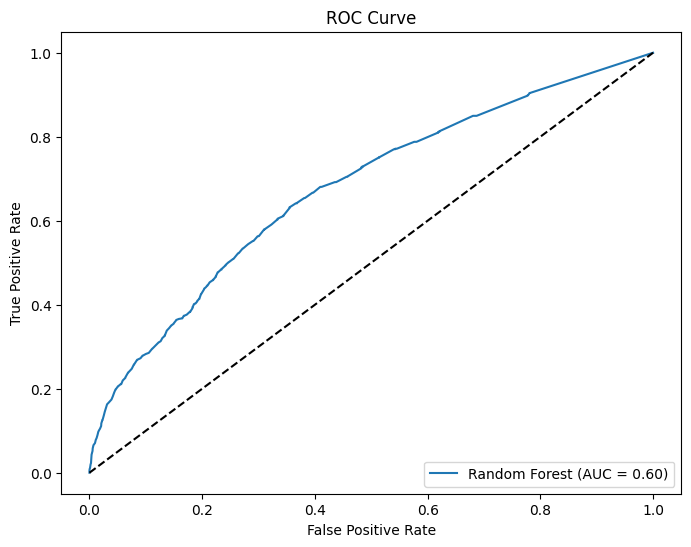

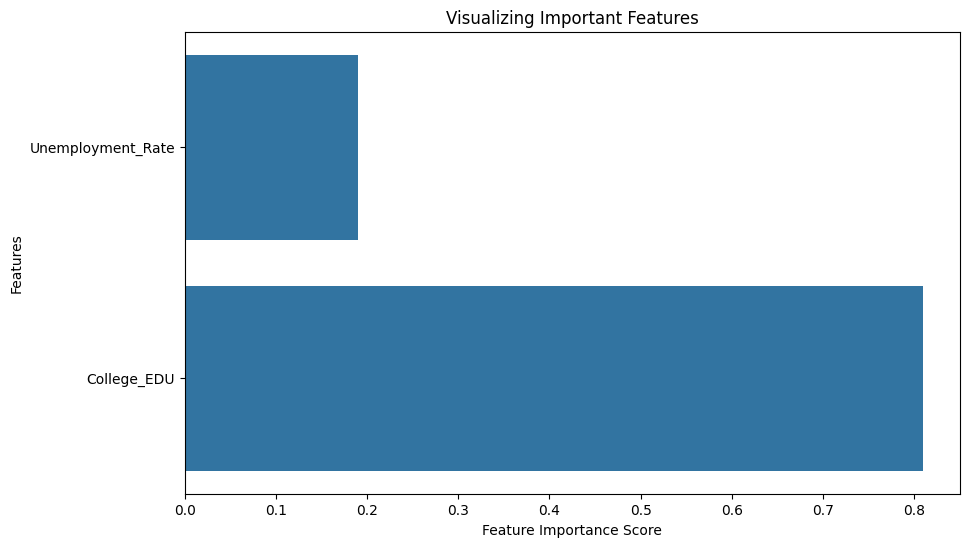

In [ ]:
# Define a new binary target variable based on 'democrat_scaled' where >0.5 is 1 (Democratic win), else 0 (Republican win)
final_dataset_cleaned['target'] = (final_dataset_cleaned['democrat_scaled'] > 0.5).astype(int)

# Exclude non-predictive or leaky features from the feature set
predictive_features = ['Unemployment_Rate', 'College_EDU']

# Select only the predictive features for X
X = final_dataset_cleaned[predictive_features]
y = final_dataset_cleaned['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

#predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate various performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

# Calculate false positive rates and true positive rates for various threshold values
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Model 2: Support Vector Machine

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Feature Engineering
# Convert 'year' to a string to treat it as a categorical feature for one-hot encoding
final_dataset_cleaned['year'] = final_dataset_cleaned['year'].astype(str)

# Specify features and target
predictive_features = ['year', 'Unemployment_Rate', 'College_EDU']  # Include 'year' for one-hot encoding
target_feature = 'target'  # Binary target feature created previously

# Define a column transformer with one-hot encoding for categorical features and scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Unemployment_Rate', 'College_EDU']),
        ('cat', OneHotEncoder(), ['year'])
    ]
)

# Create the SVM pipeline
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', probability=True))
])

# Split the data into training and testing sets
X = final_dataset_cleaned[predictive_features]
y = final_dataset_cleaned[target_feature]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_pipeline.fit(X_train, y_train)

# Predict on the test set and evaluate
y_pred = svm_pipeline.predict(X_test)
y_pred_proba = svm_pipeline.predict_proba(X_test)[:, 1]  # Get probability estimates for ROC curve

# Calculate and print performance metrics as before, plot ROC curve


Accuracy: 0.8183034519668183
Precision: 0.7100371747211895
Recall: 0.24116161616161616
F1 Score: 0.3600377002827521
ROC AUC Score: 0.7250630241292382


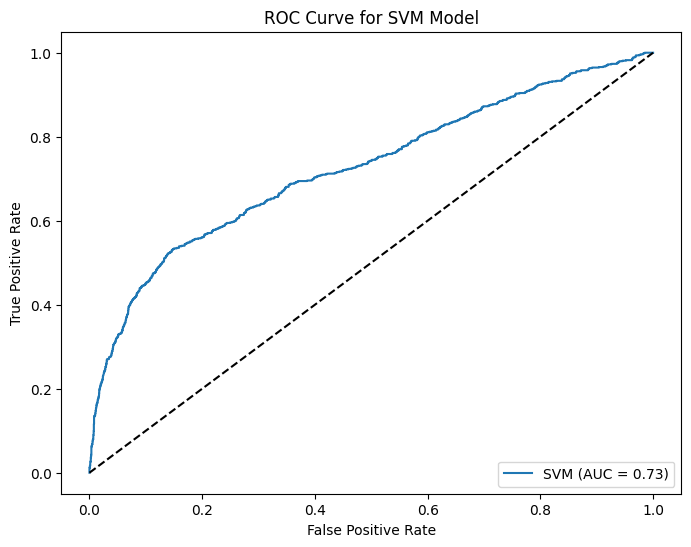

In [ ]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='SVM (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.title('ROC Curve for SVM Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()



<ipython-input-26-4ed705ac7432>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_accuracy, x='year', y='correct', palette='viridis')


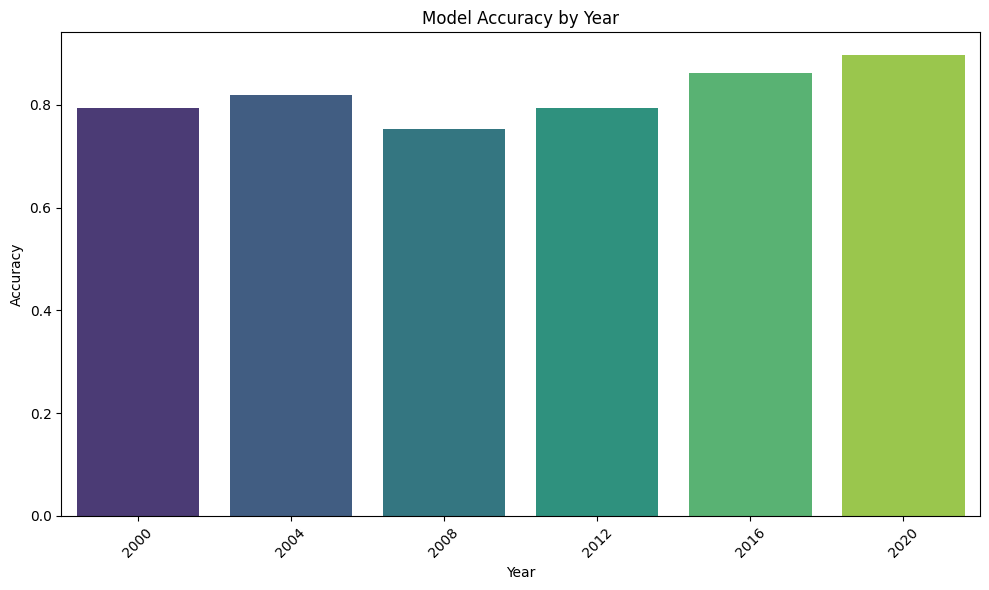

In [ ]:
# Add the predictions and true values back into the dataframe
X_test['true_label'] = y_test
X_test['predicted_label'] = y_pred
X_test['correct'] = X_test['true_label'] == X_test['predicted_label']

# Group by year and calculate accuracy for each year
yearly_accuracy = X_test.groupby('year')['correct'].mean().reset_index()

# Create the visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_accuracy, x='year', y='correct', palette='viridis')
plt.title('Model Accuracy by Year')
plt.xlabel('Year')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.tight_layout()
plt.show()

Model 3: Gradient Boost

1. Train the Gradient Boosting Model
First, you will need to set up your dataset similarly to how we did for the SVM model, keeping only relevant predictive features and excluding the target variable, 'democrat_scaled', 'republican_scaled', and other non-predictive columns.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# Define predictive features and target variable
predictive_features = ['Unemployment_Rate', 'College_EDU']  # Add other features as necessary
X = final_dataset_cleaned[predictive_features]
y = final_dataset_cleaned['target']  # target as defined previously

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

2. Evaluate the Model
You'll evaluate the model using similar metrics as before: accuracy, ROC curve, and ROC AUC score.

In [ ]:
# Make predictions
y_pred = gb_clf.predict(X_test)
y_pred_proba = gb_clf.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Output the metrics
print(f"Accuracy: {accuracy}")
print(f"ROC AUC Score: {roc_auc}")


Accuracy: 0.8148247257158149
ROC AUC Score: 0.7444204352523538


3. Visualize the ROC Curve
To compare the performance of the Gradient Boosting model, you can plot the ROC curve.

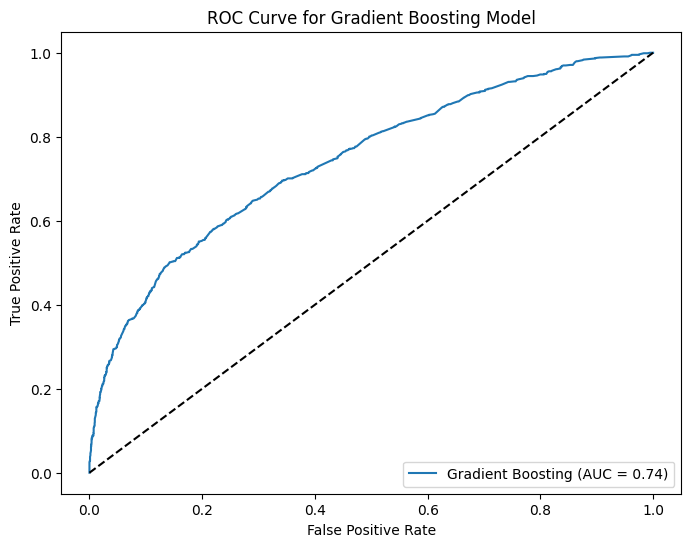

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for Gradient Boosting Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


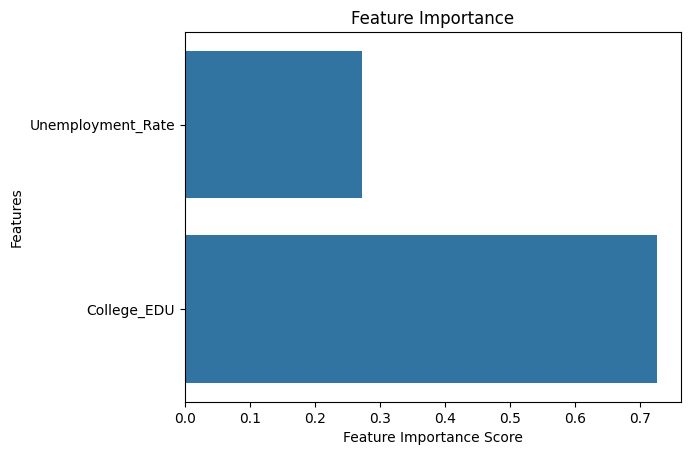

In [ ]:
import seaborn as sns

# Get feature importances
feature_importance = gb_clf.feature_importances_

# Create a bar plot
sns.barplot(x=feature_importance, y=predictive_features)
plt.title('Feature Importance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    # Add other parameters here
}

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# View the best parameters from fitting the grid search
print(grid_search.best_params_)

# Train a new classifier using the best parameters found by the grid search
best_gb_clf = grid_search.best_estimator_

# Evaluate the best model found from the grid search
y_pred = best_gb_clf.predict(X_test)
y_pred_proba = best_gb_clf.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
best_roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Best ROC AUC Score from Grid Search: {best_roc_auc}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
{'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC AUC Score from Grid Search: 0.7462331292552005


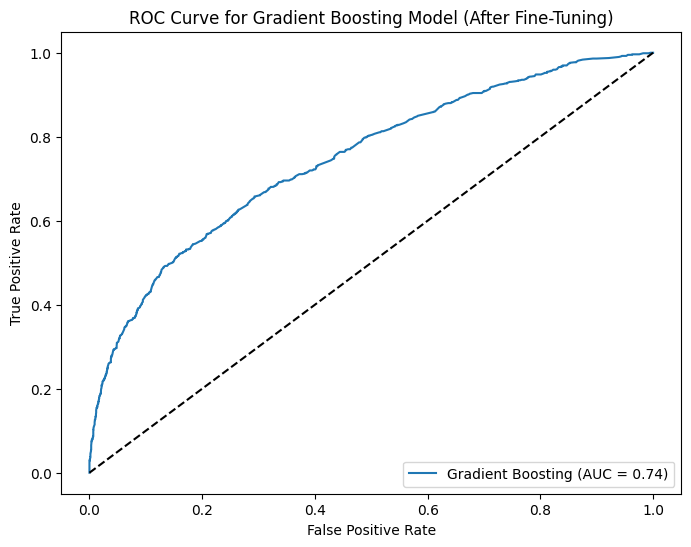

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for Gradient Boosting Model (After Fine-Tuning)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

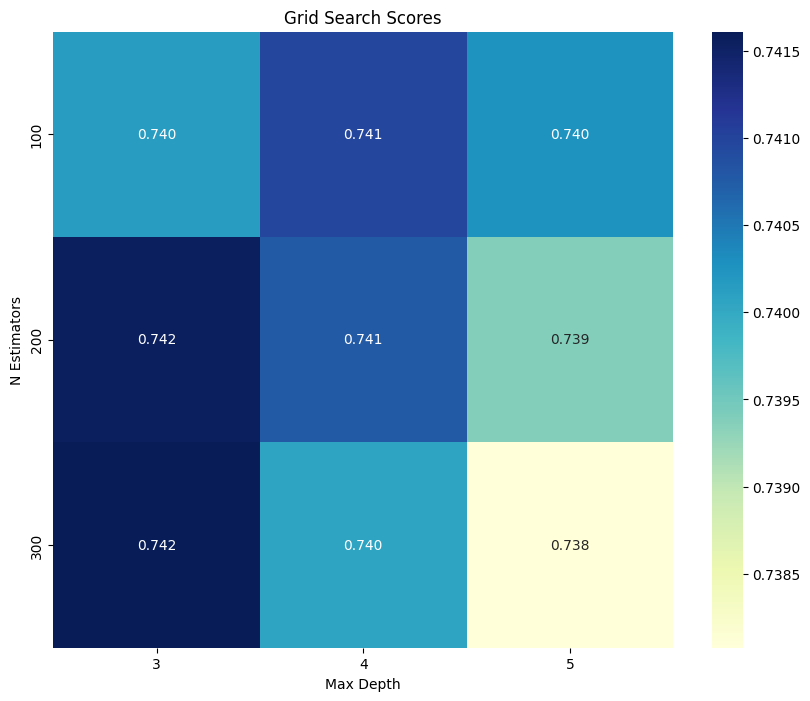

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the GridSearchCV results into a pandas DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Aggregate the mean scores for each parameter combination
agg_results = results_df.groupby(['param_n_estimators', 'param_max_depth']).agg({
    'mean_test_score': 'mean'
}).reset_index()

# Pivot the aggregated DataFrame
pivoted_df = agg_results.pivot(index='param_n_estimators', columns='param_max_depth', values='mean_test_score')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivoted_df, annot=True, fmt=".3f", cmap='YlGnBu')
plt.title("Grid Search Scores")
plt.xlabel("Max Depth")
plt.ylabel("N Estimators")
plt.show()


Model 4: